In [1]:
# -*- coding: utf-8 -*-
import os
from matplotlib import pyplot as plt
from PIL import Image
from pylab import *
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [27]:
def get_min_max_scaler(train_path):
    files = os.listdir(train_path)  # 得到文件夹下的所有文件名称
    s = []
    for file in files:  # 遍历文件夹
        if not os.path.isdir(file):  # 判断是否是文件夹，不是文件夹才打开
            f = open(train_path + "/" + file);  # 打开文件
            iter_f = iter(f);  # 创建迭代器
            str1 = ""
            for line in iter_f:  # 遍历文件，一行行遍历，读取文本
                str1 = str1 + line
            s.append(str1)  # 每个文件的文本存到list中
    a = []
    for x in s:
        l = []
        for i in x.split('\n'):
            if i == '':
                continue;
            l.append(float(i))
        a.append(np.array(l[:-1]))
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))
    a = min_max_scaler.fit_transform(a)
    return min_max_scaler

In [28]:
#读取图片并转为数组
def addImage(image_list, path, count, min_max_scaler):
    image = []
    im = array(Image.open(path + str(count) + ".bmp"))  
    for i in range(40):
        for j in range(50):
            image.append(im[i][j][1]/255)
    image_list.append(image)
    return image_list

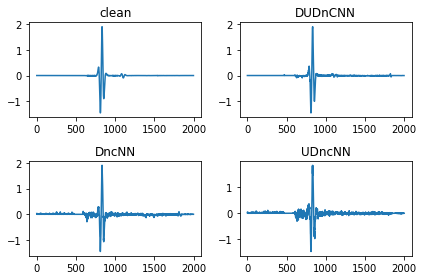

In [30]:
DUDnCNN_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/DUDnCNN结果集/"
DncNN_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/DncNN结果集/"
UDncNN_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/UDncNN结果集/"
clean_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/干净图像结果集/"
train_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/干净信号txt"
min_max_scaler = get_min_max_scaler(train_path) # 获得归一化的构造器,用于还原


count = 6
image_list = []
image_list = addImage(image_list, clean_path, count, min_max_scaler)
image_list = addImage(image_list, DUDnCNN_path, count, min_max_scaler)
image_list = addImage(image_list, DncNN_path, count, min_max_scaler)
image_list = addImage(image_list, UDncNN_path, count, min_max_scaler)

# print(np.array(image_list).shape)
image_list = min_max_scaler.inverse_transform(image_list)

plt.subplot(2, 2, 1)
plt.title('clean')
plt.plot(image_list[0])

plt.subplot(2, 2, 2)
plt.title('DUDnCNN')
plt.plot(image_list[1])

plt.subplot(2, 2, 3)
plt.title('DncNN')
plt.plot(image_list[2])

plt.subplot(2, 2, 4)
plt.title('UDncNN')
plt.plot(image_list[3])
plt.tight_layout()
